In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, defaultdict

class GridWorld:
    def __init__(self, size, obstacles, start, goal):
        self.size = size
        self.obstacles = obstacles
        self.start = start
        self.goal = goal
        self.grid = np.zeros(size)
        for obs in obstacles:
            self.grid[obs] = -1
        self.grid[goal] = 1
    
    def is_valid(self, position):
        x, y = position
        return 0 <= x < self.size[0] and 0 <= y < self.size[1] and self.grid[position] != -1

    def get_possible_actions(self, position):
        x, y = position
        actions = [(x + dx, y + dy) for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]]
        return [a for a in actions if self.is_valid(a)]

class QLearningAgent:
    def __init__(self, gridworld, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.gridworld = gridworld
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = defaultdict(lambda: defaultdict(float))
        self.path = []
    
    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.gridworld.get_possible_actions(state))
        return max(self.gridworld.get_possible_actions(state), key=lambda a: self.q_table[state][a], default=state)
    
    def train(self):
        for _ in range(self.episodes):
            state = self.gridworld.start
            while state != self.gridworld.goal:
                action = self.choose_action(state)
                reward = 1 if action == self.gridworld.goal else -0.01
                next_state = action
                best_next_action = max(self.gridworld.get_possible_actions(next_state), key=lambda a: self.q_table[next_state][a], default=next_state)
                self.q_table[state][action] += self.alpha * (reward + self.gamma * self.q_table[next_state][best_next_action] - self.q_table[state][action])
                state = next_state
    
    def find_path(self):
        state = self.gridworld.start
        self.path = [state]
        while state != self.gridworld.goal:
            state = self.choose_action(state)
            self.path.append(state)
        return self.path
    
    def display_path(self):
        grid = np.copy(self.gridworld.grid)
        for x, y in self.path:
            grid[x, y] = 0.5
        plt.imshow(grid, cmap='coolwarm', origin='upper')
        plt.colorbar()
        plt.show()

class OptimalPath:
    @staticmethod
    def bfs(gridworld):
        queue = deque([(gridworld.start, [gridworld.start])])
        visited = set()
        while queue:
            current, path = queue.popleft()
            if current in visited:
                continue
            visited.add(current)
            if current == gridworld.goal:
                return path
            x, y = current
            for move in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                next_pos = (x + move[0], y + move[1])
                if next_pos not in visited and gridworld.is_valid(next_pos):
                    queue.append((next_pos, path + [next_pos]))
        return []

    @staticmethod
    def display_optimal_path(gridworld, path):
        grid = np.copy(gridworld.grid)
        for x, y in path:
            grid[x, y] = 0.75
        plt.imshow(grid, cmap='coolwarm', origin='upper')
        plt.colorbar()
        plt.show()


Agent Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


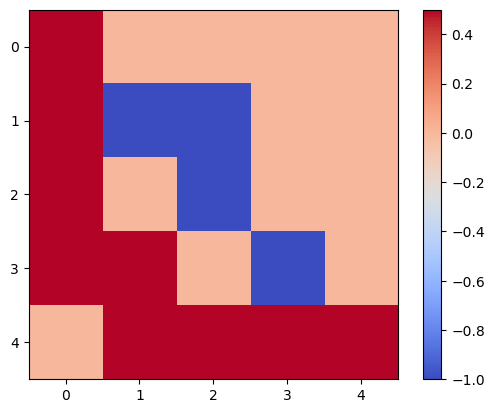

Optimal Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


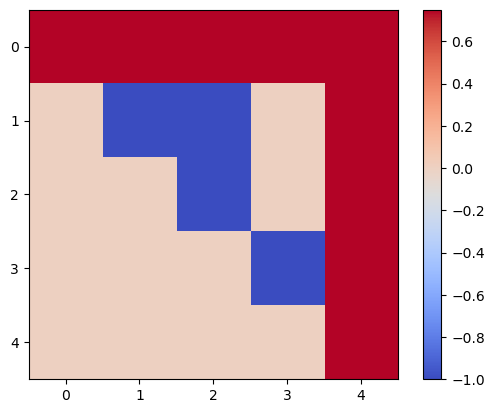

In [2]:
gridworld = GridWorld((5, 5), [(1, 1), (1, 2), (2, 2), (3, 3)], (0, 0), (4, 4))
agent = QLearningAgent(gridworld)
agent.train()
agent_path = agent.find_path()
print("Agent Path:", agent_path)
agent.display_path()

optimal_path = OptimalPath.bfs(gridworld)
print("Optimal Path:", optimal_path)
OptimalPath.display_optimal_path(gridworld, optimal_path)

Agent Path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (4, 6), (3, 6), (4, 6), (5, 6), (6, 6)]


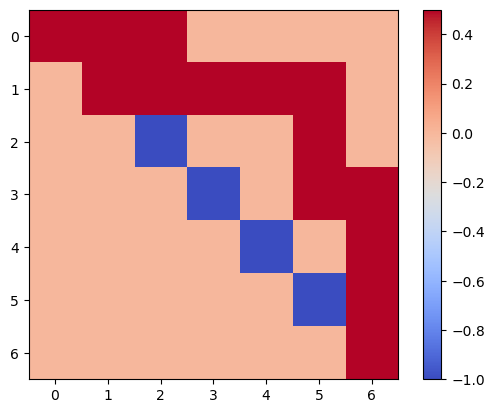

Optimal Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6)]


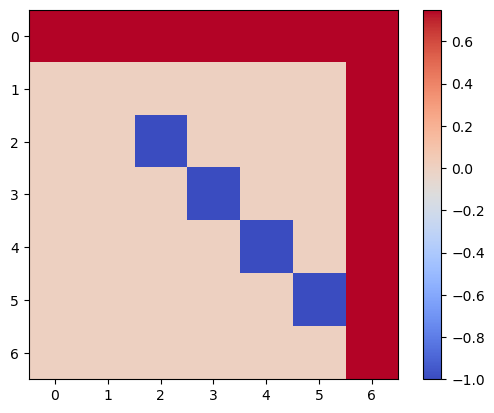

In [3]:
gridworld = GridWorld((7, 7), [(2, 2), (3, 3), (4, 4), (5, 5)], (0, 0), (6, 6))
agent = QLearningAgent(gridworld)
agent.train()
agent_path = agent.find_path()
print("Agent Path:", agent_path)
agent.display_path()

optimal_path = OptimalPath.bfs(gridworld)
print("Optimal Path:", optimal_path)
OptimalPath.display_optimal_path(gridworld, optimal_path)

Agent Path: [(0, 0), (1, 0), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (7, 3), (7, 4), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


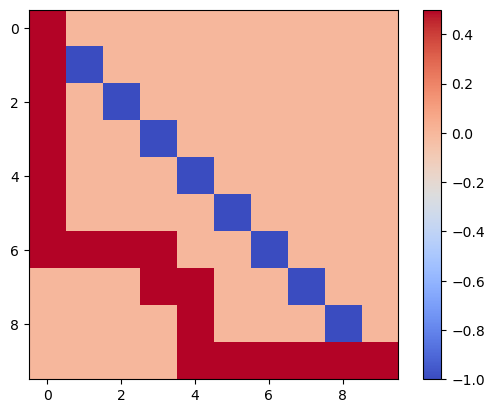

Optimal Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


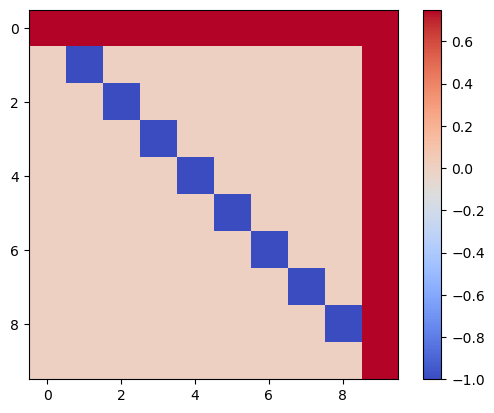

In [4]:
gridworld = GridWorld((10, 10), [(i, i) for i in range(1, 9)], (0, 0), (9, 9))
agent = QLearningAgent(gridworld)
agent.train()
agent_path = agent.find_path()
print("Agent Path:", agent_path)
agent.display_path()

optimal_path = OptimalPath.bfs(gridworld)
print("Optimal Path:", optimal_path)
OptimalPath.display_optimal_path(gridworld, optimal_path)